In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

The data was sourced from the inside Airbnb website. The website has detailed listings data in the city as of December 04, 2019. All information was scraped from the Airbnb website. The listings level detail included over 50 features, including but not limited to zip code, listing description, room type, borough, geo location, price per night, bed types, and various rating scores.

---




In [0]:
# Loading the dataset using url 
# link to the dataset
data_path='https://docs.google.com/spreadsheets/d/e/2PACX-1vTOa-Dc9XNqAqBmMegsriP9pAZ-OwOdFJNTxA4hY7IvRBLGP-q0Fz2bHoadqmYGYLWCGSSJRudUAsge/pub?gid=936462023&single=true&output=csv'
# loading the dataset using pandas
data=pd.read_csv(data_path)

In [0]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [0]:
# checking for any na values if present
data.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [0]:
data.drop(['latitude','longitude','calculated_host_listings_count','availability_365'],axis=1)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [0]:
#created a new column with name 'last_review' and changing it to datetime datatype
data['Last_Review']=pd.to_datetime(data['last_review'])
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Last_Review
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1,2019-11-04
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1,2019-11-22
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19,2019-10-13
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365,2017-10-05
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242,2019-11-21


In [0]:
# checking for difference in the neighbourhood_group and neighbourhood
ports=data[['neighbourhood_group','neighbourhood']].drop_duplicates()
ports[ports['neighbourhood'].duplicated(keep = False)]


,neighbourhood_group,neighbourhood


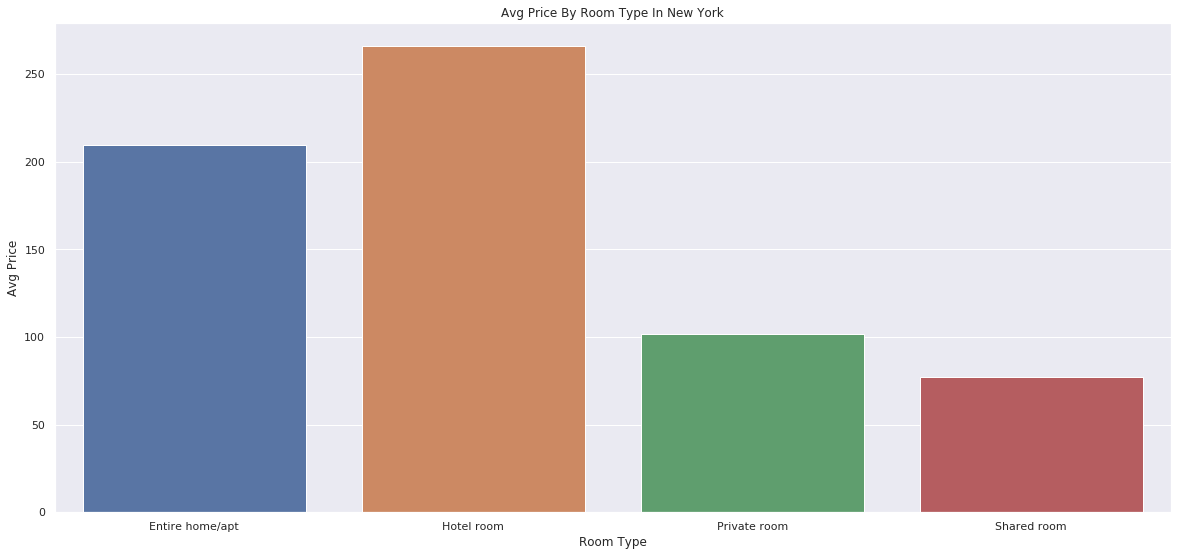

In [0]:
avg_price_by_room_data = data.groupby('room_type', as_index=False)['price'].mean()
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.barplot(x="room_type", y="price", data=avg_price_by_room_data)
ax.set(xlabel='Room Type', ylabel='Avg Price')
ax.set_title('Avg Price By Room Type In New York')
plt.show()

As we can see from the graph, the price will be highest if people choose hotel room to stay in New York, more than 250 dollar per night. Following by entire home/apt. Private room and shared room are some options for people want to save budget with the price lesser 100 per night.
In addition, the graph also shows the pricing density for each room type in the city on Airbnb: entire home/apt, private room, shared room. Based on the graph, there is psychological economic based pricing evident in each room type. 
I predict in the future, entire home or apartment will be increase more because of the reasonable price.




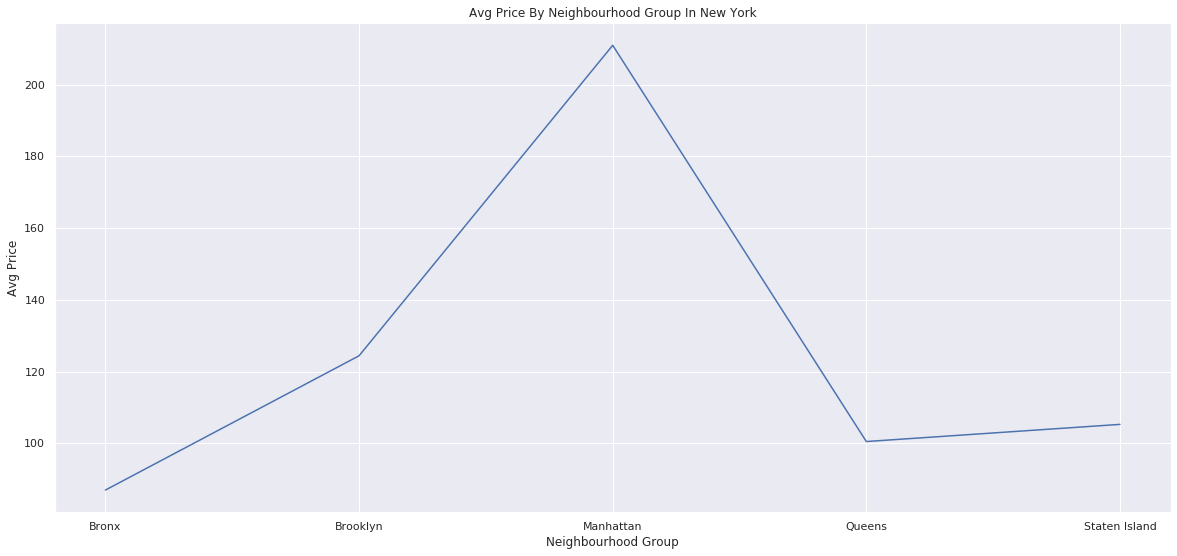

In [0]:
avg_price_by_ng_data = data.groupby('neighbourhood_group', as_index=False)['price'].mean()
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.lineplot(x="neighbourhood_group", y="price", data=avg_price_by_ng_data)
ax.set(xlabel='Neighbourhood Group', ylabel='Avg Price')
ax.set_title('Avg Price By Neighbourhood Group In New York')
plt.show()

In [0]:
#count_by_ng_data = data.groupby('neighbourhood_group', as_index=False)['id'].count()
count_by_ng_data = pd.DataFrame(data.groupby('neighbourhood_group')['id'].count())
import plotly.graph_objects as go
fig1 = go.Figure(data=[go.Pie(labels=count_by_ng_data.index, values=count_by_ng_data.id)])
fig1.update_layout(
    title = {
        'text': "Percentage of host by neighbourhood group",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig1.show()



```
# This is formatted as code
```

The graph illustrated how many percentage of airbnb host by neighbourhood group in New York. It is clear that Manhattan is the highest place in New York with 43.6% number of host in total. Following by Brooklyn. The fact is Airbnb rentals are extremely popular across Brooklyn. I predict that the number of host in Brooklyn will tend to increase in the coming years due to cheaper rents than Mahattan.


Text(0.5, 1.0, 'Price And Guest Satisfaction')

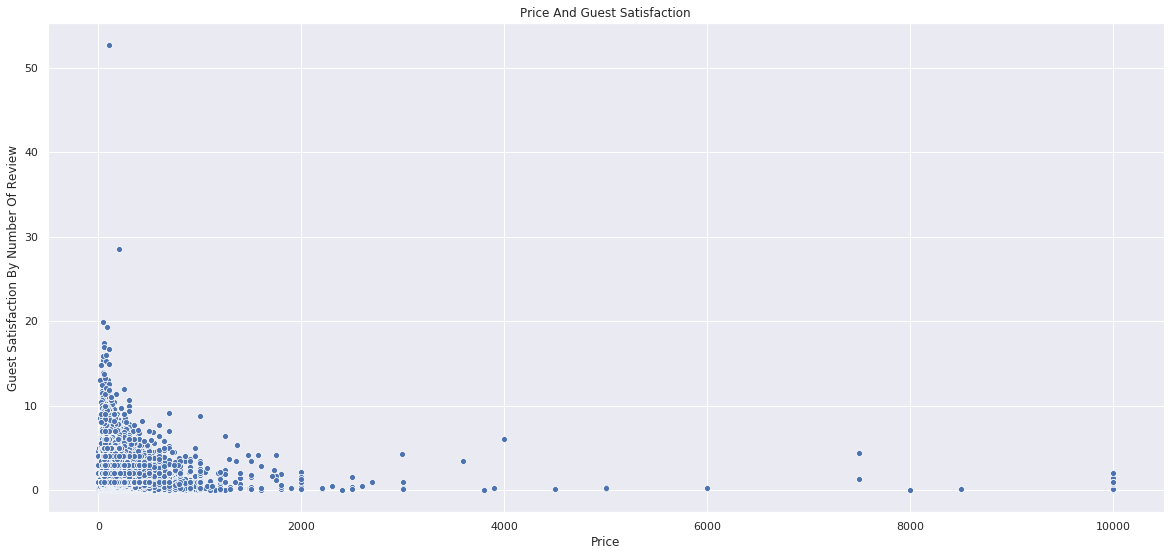

In [0]:
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.scatterplot(x="price", y="reviews_per_month", data=data)
ax.set(xlabel='Price', ylabel='Guest Satisfaction By Number Of Review')
ax.set_title('Price And Guest Satisfaction')

Based on the amount of customer satisfaction compared to the price, it's easy to see that the room price fluctuates below two thousand dollars per month getting the most reviews from customers. The higher price options receive less reviews as well as the number of customers choosing airbnb to stay in when they arrive in New York.

In conclusion, I scraped a large portion of Airbnb's New York listings and performed exploratory data analysis on the dataset. It was seen that many listings in Airbnb were full apartments and that the price had a broad range. The listings' prices and locations were visualized on a map of NYC. The report were reflecting the correlation between the location with price as well as the satisfation of guest and the price. 